In [1]:
from pydub import AudioSegment
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import sgd
import tensorflow as tf
import numpy as np
import math

Using TensorFlow backend.


In [2]:
#Compute spectogram of each audio

SR = 22050
def get_short_time_fourier_transform(soundwave):
    return librosa.stft(soundwave, n_fft=256)

def short_time_fourier_transform_amplitude_to_db(stft):
    return librosa.amplitude_to_db(stft)

def soundwave_to_np_spectogram(soundwave):
    step1 = get_short_time_fourier_transform(soundwave)
    step2 = short_time_fourier_transform_amplitude_to_db(step1)
    step3 = step2/100
    return step3

def inspect_data(sound):
#    plt.figure()
#    plt.plot(sound)
#    IPython.display.display(IPython.display.Audio(sound, rate=SR))
    a = get_short_time_fourier_transform(sound)
    Xdb = short_time_fourier_transform_amplitude_to_db(a)
#    plt.figure()   
#    plt.imshow(Xdb)    
#    plt.show()
#    print (Xdb.shape)
#    print("Length per sample: %d, shape of spectogram: %s, max: %f min: %f" % (len(sound), str(Xdb.shape), Xdb.max(), Xdb.min()))
    return Xdb

In [3]:
i = 0
j = 0
k = 0
number_list_train = ['']
number_list_test = ['']
file_count = 107
file_count2 = 35
input_array_train = ['']
phq8_array_train = ['']
input_array_train *= file_count
phq8_array_train *= file_count
number_list_train *= file_count
input_array_test = ['']
phq8_array_test = ['']
input_array_test *= file_count2
phq8_array_test *= file_count2
number_list_test *= file_count2

In [ ]:
#Abrir archivos de audio y segmentar por segmento de tiempo.
#Exportar los segmentos a otra carpeta para su posterior analisis


number = 0

l = 0
m = 0
      
data = open('C:/Users/Fran/Desktop/Database/datos1.txt', 'r', encoding='utf-8-sig')
for line in data:
    mylist = line.split(',')
    number = mylist[0]
    df = pd.read_csv('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' 
                     + str(number) + '_TRANSCRIPT.csv', header=0)
    while i < len (df):
        a = df.iloc[i].str.split()
        if a[0][2] == 'Participant' and j == 0: 
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav', format="wav")
            j = 1
        elif a[0][2] == 'Participant':
            
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba/' + str(number) + 'segmento.wav', format="wav")
            sound1 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav')
            sound2 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(number) + 'segmento.wav')

            combined_sounds = sound1 + sound2
            combined_sounds.export('C:/Users/Fran/Desktop/prueba/' + str(number) + '.wav', format="wav")
        i += 1
             
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_train[l] = w
    number_list_train[l] = number
    phq8_array_train[l] = mylist[1]
    l += 1
    j = 0
    i = 0
    


In [ ]:
i = 0
l = 0
m = 0
data1 = open('C:/Users/Fran/Desktop/Database/datos2_dev.txt', 'r', encoding='utf-8-sig')
for line in data1:
    mylist = line.split(',')
    number = mylist[0]
    df = pd.read_csv('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' 
                     + str(number) + '_TRANSCRIPT.csv', header=0)
    while i < len (df):
        a = df.iloc[i].str.split()
        if a[0][2] == 'Participant' and j == 0: 
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav', format="wav")
            j = 1
        elif a[0][2] == 'Participant':
            
            newAudio = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' 
                                             + str(number) + '_P/' + str(number) + '_AUDIO.wav')
            t1 = int(float(a[0][0]) * 1000)
            t2 = int(float(a[0][1]) * 1000)
            newAudio = newAudio[t1:t2]
            newAudio.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + 'segmento.wav', format="wav")
            sound1 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav')
            sound2 = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(number) + 'segmento.wav')

            combined_sounds = sound1 + sound2
            combined_sounds.export('C:/Users/Fran/Desktop/prueba_test/' + str(number) + '.wav', format="wav")
        i += 1
             
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_test[l] = w
    number_list_test[l] = number
    phq8_array_test[l] = mylist[1]
    l += 1
    j = 0
    i = 0 

In [5]:
#creacion de arrays
l = 0
data = open('C:/Users/Fran/Desktop/Database/datos1.txt', 'r', encoding='utf-8-sig')
for line in data:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_train[l] = w
    number_list_train[l] = number
    phq8_array_train[l] = mylist[1]
    l += 1
    
l = 0
data1 = open('C:/Users/Fran/Desktop/Database/datos2_dev.txt', 'r', encoding='utf-8-sig')
for line in data1:
    mylist = line.split(',')
    number = mylist[0]
    w = AudioSegment.from_wav('C:/Users/Fran/Desktop/Database/' + str(number) + '_P/' + str(number) + '_AUDIO.wav')
    input_array_test[l] = w
    number_list_test[l] = number
    phq8_array_test[l] = mylist[1]
    l += 1

In [6]:
len_list_train = ['']
len_list_test = ['']
len_list_train *= file_count
len_list_test *= file_count2
i = 0
j = 0


for audio_number in number_list_train:
    Audio_train = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(audio_number) + '.wav')
    len_list_train[i] = int(len(Audio_train) / (1000))
    i += 1
    
    
for audio_number in number_list_test:
    Audio_test = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(audio_number) + '.wav')
    len_list_test[j] = int(len(Audio_test) / (1000))
    j += 1
    


In [ ]:
minimun_audio_train = np.min(len_list_train)
minimun_audio_test = np.min(len_list_test)

In [7]:
t1_train_ini = 25 * 1000
t1_test_ini = 25 * 1000
t2_train_end = 30 * 1000
t2_test_end = 30 * 1000

for audio_number in number_list_train:
    Audio_train = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba/' + str(audio_number) + '.wav')
    Audio_train = Audio_train[t1_train_ini:t2_train_end]
    Audio_train.export('C:/Users/Fran/Desktop/database_train/' + str(audio_number) + '.wav', format="wav")
    
    
for audio_number in number_list_test:
    Audio_test = AudioSegment.from_wav('C:/Users/Fran/Desktop/prueba_test/' + str(audio_number) + '.wav')
    Audio_test = Audio_test[t1_train_ini:t2_train_end]
    Audio_test.export('C:/Users/Fran/Desktop/database_test/' + str(audio_number) + '.wav', format="wav")

In [8]:
#Spectograms of each segmented audio

i = 0
Xdb_train = ['']
Xdb_train_normalized = ['']
Xdb_train *= file_count
Xdb_train_normalized *= file_count

Xdb_test = ['']
Xdb_test_normalized = ['']
Xdb_test *= file_count2
Xdb_test_normalized *= file_count2

for audio_train in number_list_train:
    X, sr = librosa.load('C:/Users/Fran/Desktop/database_train/' + str(audio_train) + '.wav')
    Xdb_train[i] = inspect_data(X)
    #Xdb_train_normalized[i] = tf.log(tf.abs(Xdb_train[i]) + 0.01)
    i += 1

i = 0

for audio_test in number_list_test:
    X, sr = librosa.load('C:/Users/Fran/Desktop/database_test/' + str(audio_test) + '.wav')
    Xdb_test[i] = inspect_data(X)
    #Xdb_test_normalized[i] = tf.log(tf.abs(Xdb_test[i]) + 0.01)
    i += 1

C:\Users\Fran\Anaconda3\lib\site-packages\librosa\core\spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [ ]:
np.shape(Xdb_train_normalized[0])

In [ ]:
Xdb_train_normalized[0]

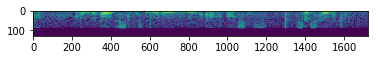

In [11]:
plt.imshow(Xdb_train[0])
alto, ancho = np.shape(Xdb_train[0])

In [ ]:
np.shape(Xdb_train)

In [12]:
num_classes = 2
batch_size = 64
epochs = 10

# convert class vectors to binary class matrices
phq8_array_train = keras.utils.to_categorical(phq8_array_train, num_classes)
phq8_array_test = keras.utils.to_categorical(phq8_array_test, num_classes)

In [13]:
Xdb_train_array = np.ndarray(shape = (107,alto,ancho))
Xdb_test_array = np.ndarray(shape = (35,alto,ancho))

In [14]:
i = 0
for train in Xdb_train:
    Xdb_train_array[i] = train
    i += 1
    
i = 0
for train in Xdb_test:
    Xdb_test_array[i] = train
    i += 1

In [15]:
Xdb_train_array = Xdb_train_array.reshape(Xdb_train_array.shape[0], alto, ancho, 1)
Xdb_test_array = Xdb_test_array.reshape(Xdb_test_array.shape[0], alto, ancho, 1)

In [16]:
print (Xdb_train_array.shape)
print (Xdb_test_array.shape)

(107, 129, 1723, 1)
(35, 129, 1723, 1)


In [17]:
#Red neuronal

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(alto,ancho,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 127, 1721, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 860, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 858, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 429, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 427, 128)      73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 213, 128)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 211, 256)      295168    
__________

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [19]:
model.fit(Xdb_train_array, phq8_array_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(Xdb_test_array, phq8_array_test))
score = model.evaluate(Xdb_test_array, phq8_array_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 107 samples, validate on 35 samples
Epoch 1/10
107/107 [==============================] - 37s 342ms/step - loss: 5.0531 - acc: 0.5047 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 2/10
107/107 [==============================] - 33s 306ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 3/10
107/107 [==============================] - 34s 320ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 4/10
107/107 [==============================] - 36s 335ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 5/10
107/107 [==============================] - 34s 314ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 6/10
107/107 [==============================] - 33s 313ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 7/10
107/107 [==============================] - 32s 303ms/step - loss: 4.5191 - acc: 0.7196 - val_loss: 5.5262 - val_acc: 0.6571
Epoch 8/10

In [ ]:
#prediccion = model.predict(Xdb_test, batch_size=batch_size, verbose=1, steps=None)